AI : 342, Data Science Final Project.

We used Weather History Dataset.

Then applied needed preprocessing on the data and visualizations, after that we used multiple ML models on the data.


Team:

| <div style="font-size: 15px">Name</div> | <div style="font-size: 15px">ID</div> |
| -------- | -------- |
| <div style="font-size: 15px">Omar Khaled</div> | <div style="font-size: 15px">94105</div> |
| <div style="font-size: 15px">Mostafa Tarek</div> | <div style="font-size: 15px">94071</div> |
| <div style="font-size: 15px">Mohamed Ezz</div> | <div style="font-size: 15px">94303</div> |
| <div style="font-size: 15px">Mohamed Omar</div> | <div style="font-size: 15px">94114</div> |
| <div style="font-size: 15px">Basel Ahmed</div> | <div style="font-size: 15px">98052</div> |


# import  libraries

In [1]:
#we will import needed libraries for our project
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# reading our Data
df= pd.read_csv(r"weatherHistory.csv")

PREPROCESSING THE DATA.

In [3]:
# show first five cells in data
df.head()

,Formatted Date,Summary,Precip_Type,Temperature,Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [4]:
# show last five cells in data
df.tail()

,Formatted Date,Summary,Precip_Type,Temperature,Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31,16.1000,0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20,15.5526,0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30,16.1000,0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20,16.1000,0,1015.95,Partly cloudy starting in the morning.
96452,2016-09-09 23:00:00.000 +0200,Partly Cloudy,rain,20.438889,20.438889,0.61,5.8765,39,15.5204,0,1016.16,Partly cloudy starting in the morning.


In [5]:
#Detecting NULL values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip_Type                 517
Temperature                   0
Apparent_Temperature_(C)      0
Humidity                      0
Wind_Speed_(km/h)             0
Wind_Bearing_(degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [6]:
# Removing NULLS
df.dropna(inplace= True)

In [7]:
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip_Type                 0
Temperature                 0
Apparent_Temperature_(C)    0
Humidity                    0
Wind_Speed_(km/h)           0
Wind_Bearing_(degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [8]:
#Detecting duplicated values
df.duplicated().sum()

24

In [9]:
#Removing duplicated values
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
# the describe() show math operations of every numerical values {mean,std, max, min, std}
df.describe()

,Temperature,Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.000000,95912.0,95912.000000
mean,11.937975,10.859194,0.734844,10.806764,187.506986,10.362306,0.0,1003.146959
std,9.569620,10.716711,0.195717,6.920504,107.378309,4.174204,0.0,117.291484
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.594444,2.272222,0.600000,5.812100,116.000000,8.355900,0.0,1011.890000
50%,12.022222,12.022222,0.780000,9.933700,180.000000,10.046400,0.0,1016.420000
75%,18.844444,18.844444,0.890000,14.135800,290.000000,14.812000,0.0,1021.050000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [12]:
# show random saple of data
df.sample(10)

,Formatted Date,Summary,Precip_Type,Temperature,Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
22060,2008-06-14 04:00:00.000 +0200,Mostly Cloudy,rain,11.733333,11.733333,0.79,11.0446,281,14.9086,0,1011.59,Mostly cloudy throughout the day.
8829,2007-04-10 21:00:00.000 +0200,Mostly Cloudy,rain,12.450000,12.450000,0.70,9.1126,320,9.9820,0,1017.24,Partly cloudy until night.
79862,2015-08-18 17:00:00.000 +0200,Mostly Cloudy,rain,20.105556,20.105556,0.78,19.3522,302,10.3523,0,1012.81,Mostly cloudy throughout the day.
32058,2009-03-05 19:00:00.000 +0100,Windy and Mostly Cloudy,rain,9.950000,5.877778,0.77,40.8296,149,9.9820,0,985.57,Mostly cloudy until night and breezy starting ...
48989,2011-03-11 05:00:00.000 +0100,Partly Cloudy,snow,-0.155556,-3.655556,0.85,10.6743,131,9.9015,0,1021.08,Partly cloudy starting overnight continuing un...
54947,2012-02-14 11:00:00.000 +0100,Mostly Cloudy,snow,-7.222222,-7.222222,0.74,4.8300,180,6.1180,0,1017.20,Foggy in the morning.
2626,2006-02-25 10:00:00.000 +0100,Overcast,rain,1.222222,1.222222,0.98,3.8962,205,5.1037,0,1013.41,Overcast throughout the day.
60503,2012-10-30 23:00:00.000 +0100,Partly Cloudy,rain,1.138889,-2.811111,0.89,14.0070,151,15.8263,0,1014.75,Partly cloudy throughout the day.
64179,2013-02-06 03:00:00.000 +0100,Mostly Cloudy,rain,2.750000,1.022222,0.85,6.3756,162,15.8263,0,1002.79,Mostly cloudy until night.
34909,2009-09-03 13:00:00.000 +0200,Clear,rain,31.111111,30.050000,0.32,16.1000,170,9.9820,0,1011.10,Partly cloudy in the morning.


In [13]:
# Correlation
df.corr()

,Temperature,Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature,1.000000,0.992634,-0.632224,0.008659,0.029837,0.393813,NaN,-0.005286
Apparent_Temperature_(C),0.992634,1.000000,-0.602460,-0.057061,0.028846,0.382675,NaN,-0.000069
Humidity,-0.632224,-0.602460,1.000000,-0.224697,0.000769,-0.370621,NaN,0.005377
Wind_Speed_(km/h),0.008659,-0.057061,-0.224697,1.000000,0.104484,0.100847,NaN,-0.049434
Wind_Bearing_(degrees),0.029837,0.028846,0.000769,0.104484,1.000000,0.048888,NaN,-0.011643
Visibility (km),0.393813,0.382675,-0.370621,0.100847,0.048888,1.000000,NaN,0.061009
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005286,-0.000069,0.005377,-0.049434,-0.011643,0.061009,NaN,1.000000


In [14]:
# grouping data summary and count each value
df.groupby('Summary').count()

,Formatted Date,Precip_Type,Temperature,Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Summary,,,,,,,,,,,
Breezy,54,54,54,54,54,54,54,54,54,54,54
Breezy and Dry,1,1,1,1,1,1,1,1,1,1,1
Breezy and Foggy,35,35,35,35,35,35,35,35,35,35,35
Breezy and Mostly Cloudy,516,516,516,516,516,516,516,516,516,516,516
Breezy and Overcast,528,528,528,528,528,528,528,528,528,528,528
Breezy and Partly Cloudy,386,386,386,386,386,386,386,386,386,386,386
Clear,10746,10746,10746,10746,10746,10746,10746,10746,10746,10746,10746
Dangerously Windy and Partly Cloudy,1,1,1,1,1,1,1,1,1,1,1
Drizzle,39,39,39,39,39,39,39,39,39,39,39


In [15]:
# grouping data Precip_Type and count each value
df.groupby('Precip_Type').count()

,Formatted Date,Summary,Temperature,Apparent_Temperature_(C),Humidity,Wind_Speed_(km/h),Wind_Bearing_(degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Precip_Type,,,,,,,,,,,
rain,85200,85200,85200,85200,85200,85200,85200,85200,85200,85200,85200
snow,10712,10712,10712,10712,10712,10712,10712,10712,10712,10712,10712


In [16]:
# Columns Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95912 non-null  object 
 1   Summary                   95912 non-null  object 
 2   Precip_Type               95912 non-null  object 
 3   Temperature               95912 non-null  float64
 4   Apparent_Temperature_(C)  95912 non-null  float64
 5   Humidity                  95912 non-null  float64
 6   Wind_Speed_(km/h)         95912 non-null  float64
 7   Wind_Bearing_(degrees)    95912 non-null  int64  
 8   Visibility (km)           95912 non-null  float64
 9   Loud Cover                95912 non-null  int64  
 10  Pressure (millibars)      95912 non-null  float64
 11  Daily Summary             95912 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 9.5+ MB


<AxesSubplot:>

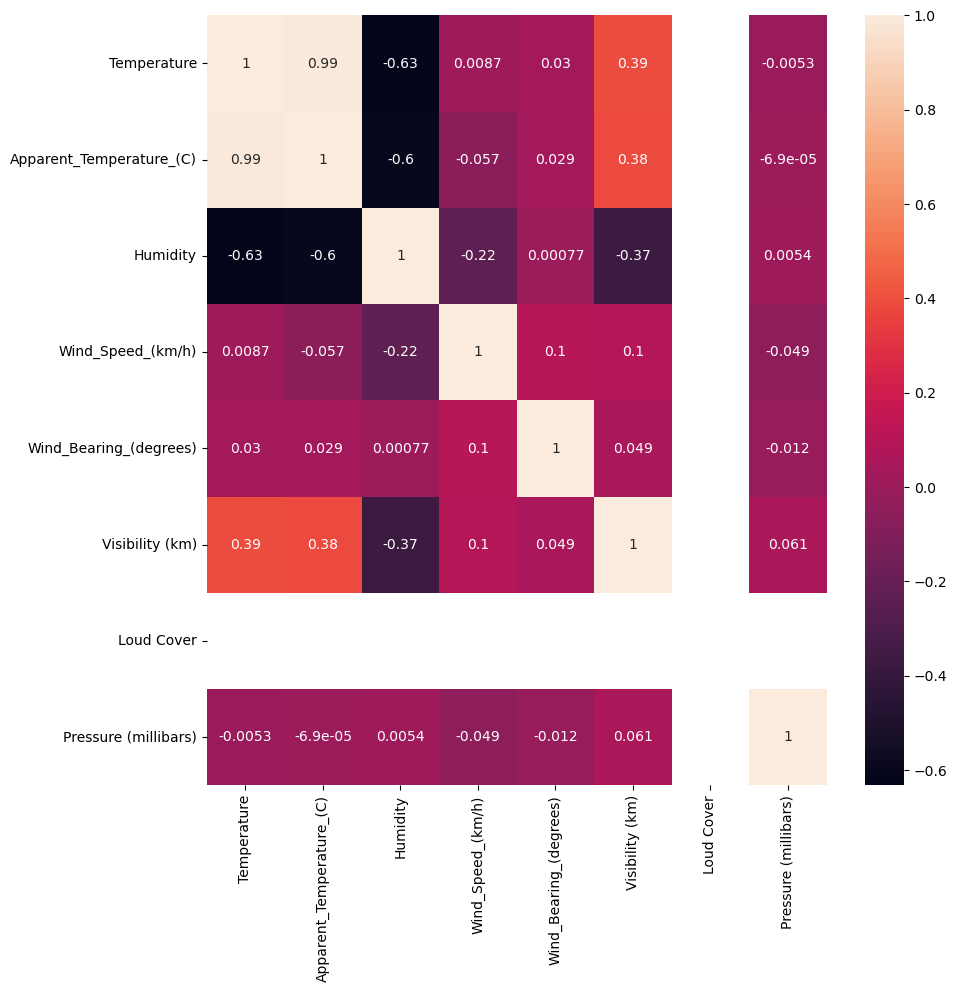

In [17]:
# Our Data Corrolation - Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [18]:
#Dropping the 'Loud Cover' column as it has no values
df.drop(['Loud Cover'], axis=1, inplace= True)

SOME VISUALIZATIONS ON THE DATA.

<AxesSubplot:>

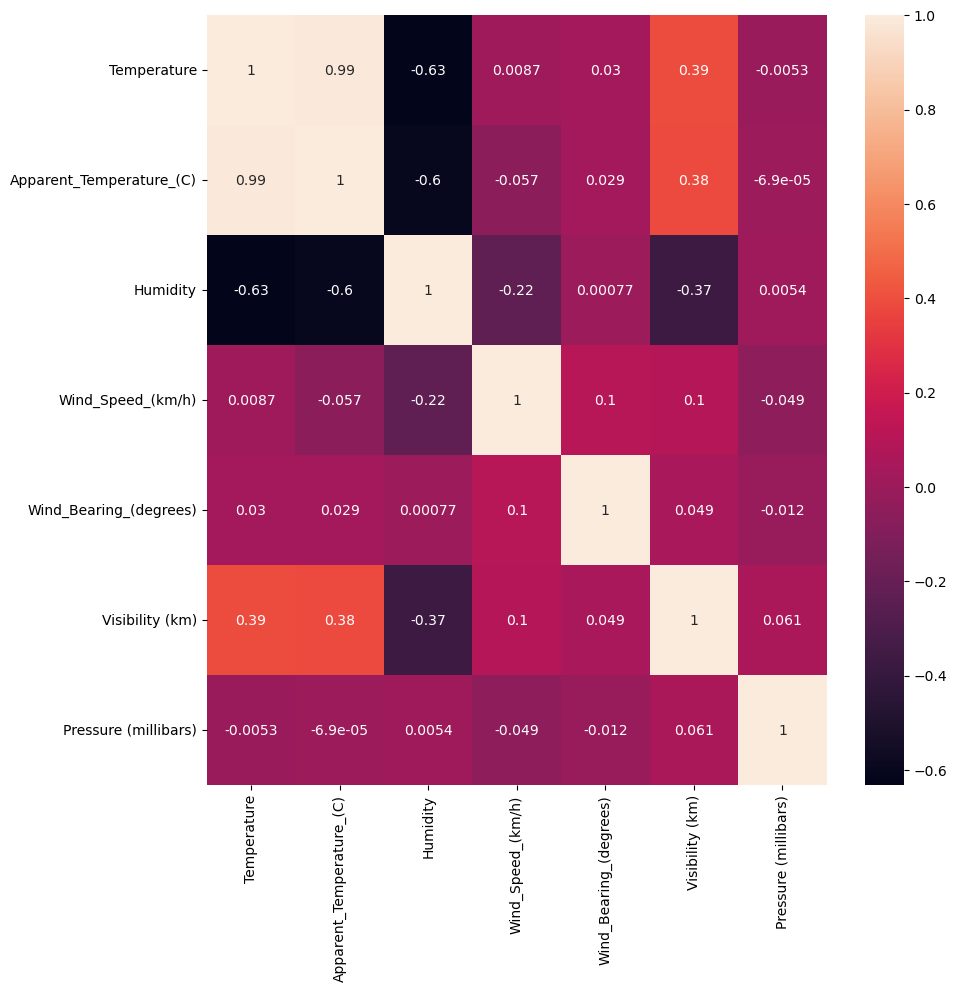

In [19]:
#Corrolation After dropping the column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

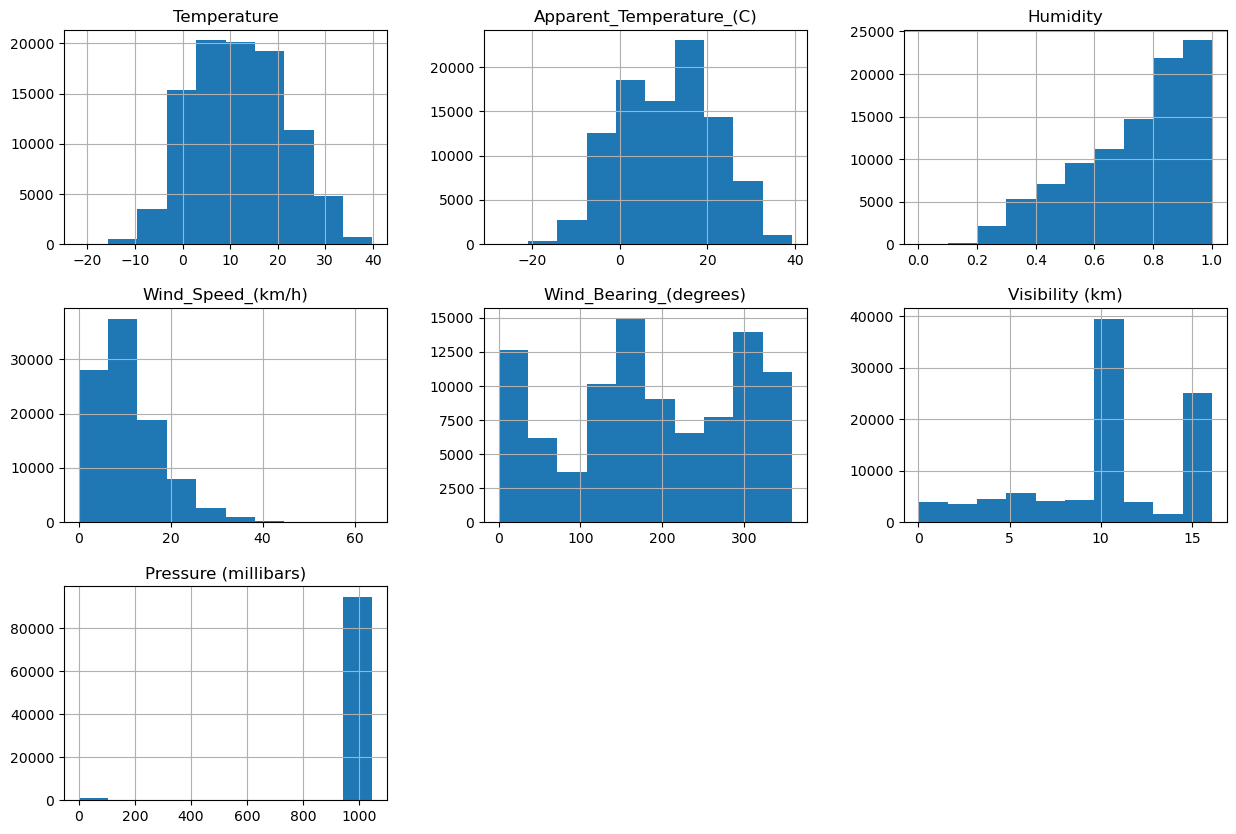

In [20]:
# histogram for each column in data
hist = df.hist(bins=10, figsize=(15,10) )

<AxesSubplot:xlabel='Temperature', ylabel='Humidity'>

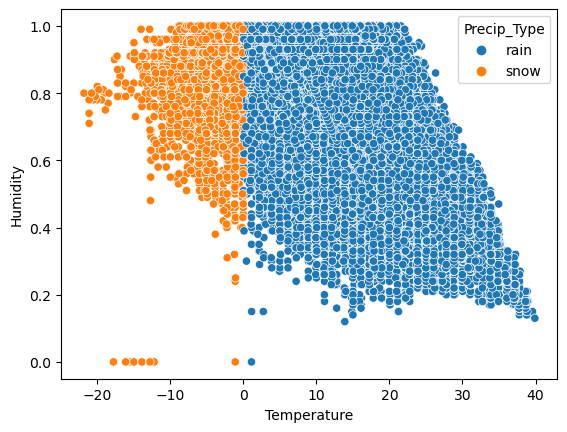

In [21]:
#Visualization on Temperature and Humidity Columns
sns.scatterplot(data = df, x = "Temperature" , y = "Humidity", hue= df.Precip_Type)

<AxesSubplot:xlabel='Visibility (km)', ylabel='Humidity'>

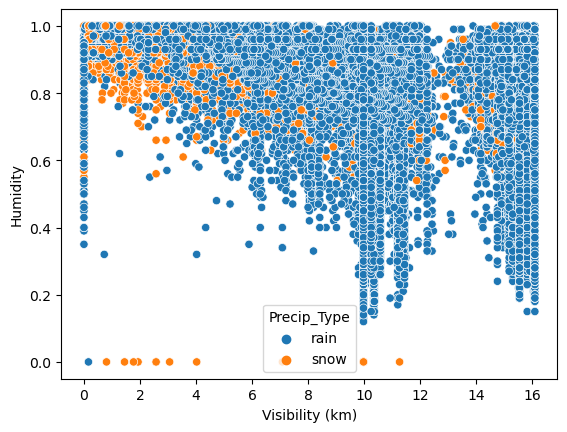

In [22]:
#Visualization on Visibility (km) and Humidity Columns
sns.scatterplot(data = df, x = "Visibility (km)" , y = "Humidity" ,hue= df.Precip_Type)

<Figure size 1000x800 with 0 Axes>

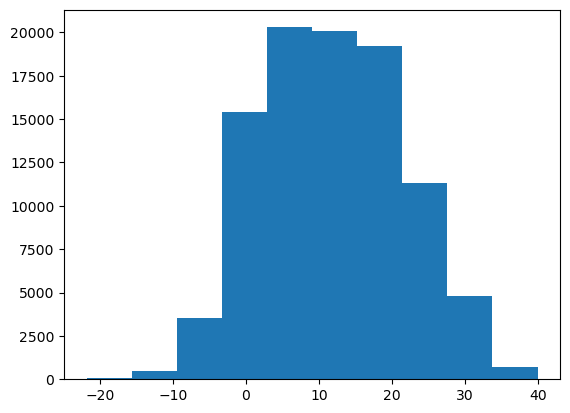

<Figure size 1000x800 with 0 Axes>

In [23]:
#Histogram on Temperature Column
plt.hist(df['Temperature'])
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

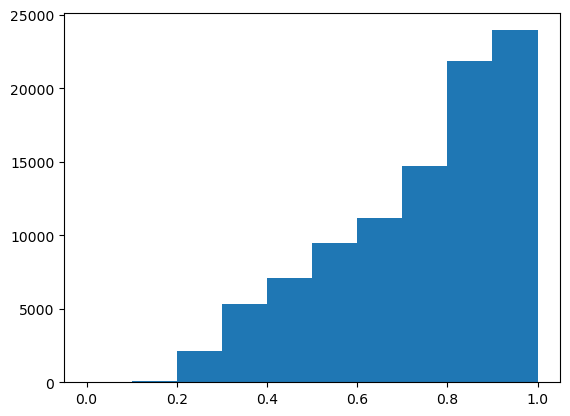

<Figure size 1000x800 with 0 Axes>

In [24]:
#Histogram on Humidity Column
plt.hist(df['Humidity'])
plt.figure(figsize=(10,8))

Machine Learning Models.

We will try multiple models so:

1- Multilayer Neural Network (NN) model.

2- k-nearest neighbors (KNN) model.

3- Support Vector Machine (SVM) model.

4- Naive Bayes model.

# NN MODEL (ADD-ON)

We applied Multi Layers in the model to get less MSE (Mean square Error)

In [25]:
y= df["Humidity"].values.reshape(-1,1)
X = df["Temperature"].values.reshape(-1,1)
#Splitting Our Data to 70% training set and 30% Testing set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    shuffle=True, random_state=0)

In [26]:
# shape of trainig x values
X_train.shape

(67138, 1)

In [27]:
# shape of trainig y values
y_train.shape

(67138, 1)

In [28]:
#Building NN Multi Layer Model
# one input layer, two hidden layers, one output layer
model = tf.keras.Sequential([keras.layers.Dense(64, input_shape=[1], activation='relu', kernel_initializer='random_normal') ])
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="linear"))

In [29]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

In [30]:
#Fitting the Model on training Data and begin training
history= model.fit(X_train, y_train, epochs=10 , steps_per_epoch=10,validation_data=(X_test, y_test) )

Epoch 1/10
10/10 [==============================] - 3s 255ms/step - loss: 0.4032 - val_loss: 0.2681
Epoch 2/10
10/10 [==============================] - 2s 232ms/step - loss: 0.2091 - val_loss: 0.1661
Epoch 3/10
10/10 [==============================] - 2s 244ms/step - loss: 0.1291 - val_loss: 0.0837
Epoch 4/10
10/10 [==============================] - 2s 213ms/step - loss: 0.0510 - val_loss: 0.0241
Epoch 5/10
10/10 [==============================] - 2s 211ms/step - loss: 0.0243 - val_loss: 0.0266
Epoch 6/10
10/10 [==============================] - 3s 285ms/step - loss: 0.0241 - val_loss: 0.0214
Epoch 7/10
10/10 [==============================] - 2s 273ms/step - loss: 0.0219 - val_loss: 0.0216
Epoch 8/10
10/10 [==============================] - 3s 275ms/step - loss: 0.0215 - val_loss: 0.0210
Epoch 9/10
10/10 [==============================] - 2s 241ms/step - loss: 0.0214 - val_loss: 0.0210
Epoch 10/10
10/10 [==============================] - 2s 238ms/step - loss: 0.0211 - val_loss: 0.0208

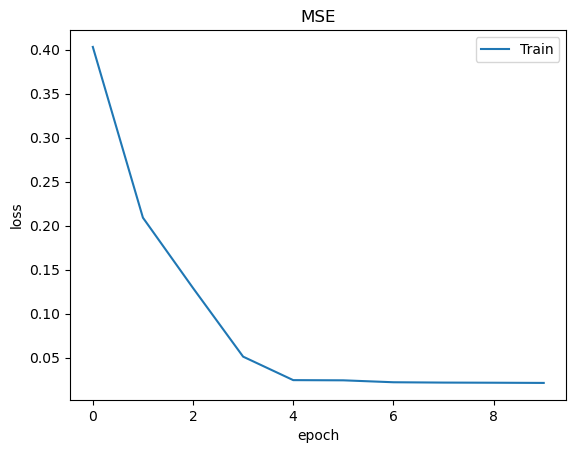

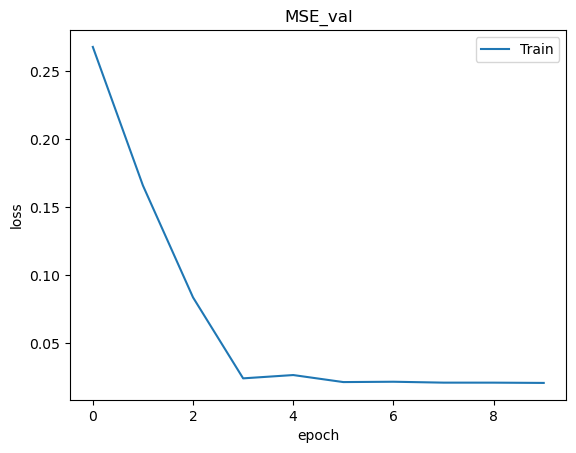

In [31]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('MSE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#summarize history for val_loss
plt.plot(history.history['val_loss'])
plt.title('MSE_val')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [32]:
model.predict(y_test)

900/900 [==============================] - 3s 3ms/step


array([[0.8386819 ],
       [0.8532824 ],
       [0.8370709 ],
       ...,
       [0.8546746 ],
       [0.83720666],
       [0.8564744 ]], dtype=float32)

In [33]:
#Model Evaluation on test Data
print("Evaluate model on test data")
results = model.evaluate(X_test, y_test, batch_size=128)
print("test loss", results)

Evaluate model on test data
225/225 [==============================] - 1s 3ms/step - loss: 0.0208
test loss 0.020771348848938942


In [34]:
#Doing predictions
print("Generate a prediction")
prediction = model.predict(X_test)


Generate a prediction
900/900 [==============================] - 2s 2ms/step


In [35]:
#Our prediction results
prediction

array([[0.6774768 ],
       [0.63410586],
       [0.8360542 ],
       ...,
       [0.6358681 ],
       [0.8404415 ],
       [0.6347278 ]], dtype=float32)

# KNN Model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [37]:
# rain = 0 || snow = 1
y = df['Precip_Type']
y = np.array([0 if value == 'rain' else 1 for value in y])

In [38]:
X = df[['Wind_Speed_(km/h)','Wind_Bearing_(degrees)','Humidity','Apparent_Temperature_(C)','Visibility (km)']]
y

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
# train data =70%, test data=30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [40]:
neigh = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test, y_pred)

0.9826579550983526

In [41]:
# confusion matrix that show TP TN FP FN
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
confusion_matrix

array([[25275,   195],
       [  304,  3000]], dtype=int64)

In [64]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix, display_labels= [ True,False])

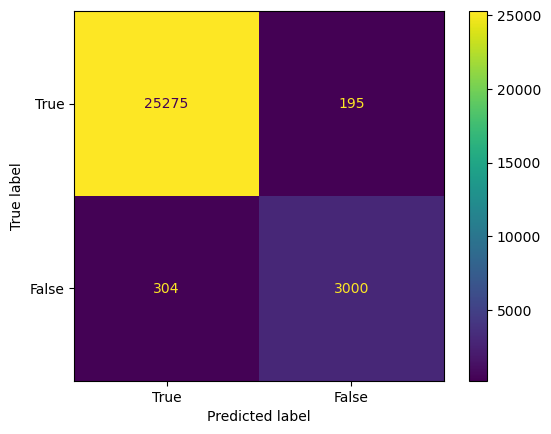

In [65]:
cm_display.plot()

plt.show()

# Support Vector Machine model

In [44]:
from sklearn.svm import SVC

In [45]:
# choosingf kernel = linear
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [46]:
prediction = svc_model.predict(X_test)

In [47]:
y_pred_2 = svc_model.predict(X_test)
accuracy_score(y_test, y_pred_2)

0.9851602140821575

In [48]:
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.9856861985760672
0.9851602140821575


In [49]:
confusion_matrix_2 = metrics.confusion_matrix(y_test,y_pred_2)
confusion_matrix_2

array([[25240,   230],
       [  197,  3107]], dtype=int64)

In [63]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_2, display_labels= [ True,False])

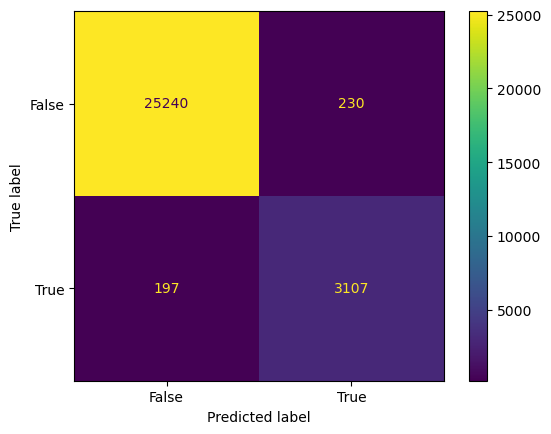

In [51]:
cm_display.plot()

plt.show()

# Naive Bayes Model.

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()  

In [54]:
gnb.fit(X_train, y_train)

GaussianNB()

In [55]:
y_pred_3 = gnb.predict(X_test)
accuracy_score(y_test, y_pred_3)

0.9349065128240773

In [56]:
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))

0.9361166552474008
0.9349065128240773


In [57]:
confusion_matrix_3 = metrics.confusion_matrix(y_test,y_pred_3)
confusion_matrix_3

array([[24176,  1294],
       [  579,  2725]], dtype=int64)

In [58]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix_3, display_labels= [ True,False])

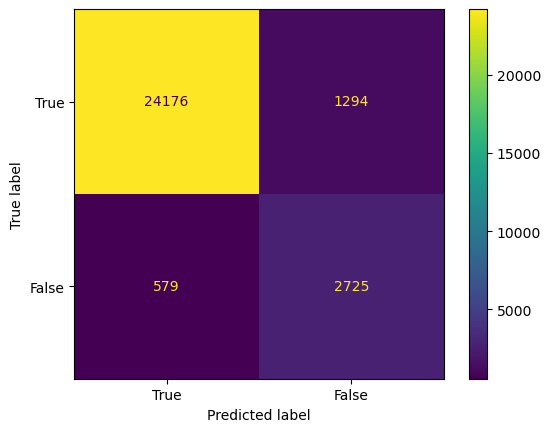

In [59]:
cm_display.plot()

plt.show()

## Questions:

### 1- `Is SVM Faster Than KNN?`

**No**, SVM was slower than KNN

### `2- Is SVM better than Naive Bayes?`

SVM was `better` than Naive Bayes in `acuuracy only`
but in `Timing`  Naive Bayes was `better` than SVM
so that when we put it in our sight
in our opinion SVM is better
because have more time but the accuracy of SVM compare to  Naive Bayes is better
but if we compare to KNN we will see KNN is better

### `3- explain the difference between label encoding, one hot encoding and normalization with example`

**label encoding** :- we need to replace the categorical value using a numerical value ranging between zero and the total number of classes minus one. For instance, if the value of the categorical variable has six different classes, we will use 0, 1, 2, 3, 4, and 5.

**one hot encoding** :- A one hot encoding is used to convert the categorical variables into numeric values. Before doing further data analysis, the categorical values are mapped to integer values. Each column contains "0" or "1" corresponding to which column it has been placed. In this process, each integer value is represented as a binary vector that is all zero expect the index of the integer, which is marked with a 1.

**normalization** :- it is used whenever the attributes of the dataset have different ranges. It helps to enhance the performance and reliability of a machine learning model. Normalization is used to minimize the redundancy from a relation or set of relations. Normalization helps to minimize data redundancy.

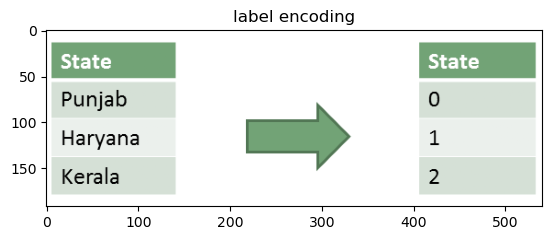

In [60]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.imshow(mpimg.imread('label encoding.png'))
plt.title("label encoding");

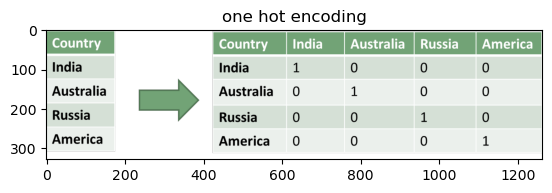

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.imshow(mpimg.imread('one hot encoding.png'))
plt.title("one hot encoding");

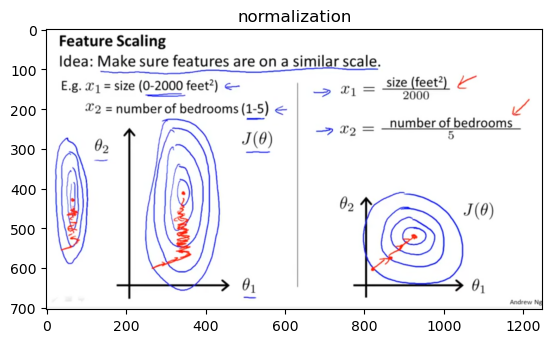

In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.imshow(mpimg.imread('normalization.png'))
plt.title("normalization");